In [177]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

import numpy as np
import math

In [178]:
data,labels = make_blobs(n_samples=10000,n_features=2,cluster_std=1)

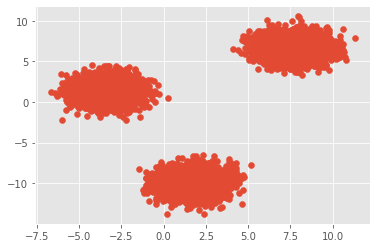

In [179]:
plt.scatter(data[:,0],data[:,1]);

In [180]:
k = 3
tol = 0.000000001
max_iter = 300

In [181]:
centroids = {}

## inicializando os centroids com os 3 primeiros valores de data
for i in range(k):
    centroids[i] = data[i]

In [182]:
for i in range(max_iter):
    
    classification = {}
    
    for i in range(k):
        classification[i] = []
        
    for point in data:
        distance = [math.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2) for centroid in centroids.values()]
        point_label = np.argmin(distance)
        classification[point_label].append(point)
        
    prev_centroids = dict(centroids)
    
    for label in classification:
        centroids[label] = np.average(classification[label],axis=0)
        
    
    optmized = True
    
    for label in centroids:
        
        original_centroid = prev_centroids[label]
        
        current_centroid = centroids[label]
        
        
        if np.sum((current_centroid - original_centroid)/ original_centroid *100.0) > tol:
            
            print(centroids)
            print(np.sum((current_centroid - original_centroid)/ original_centroid *100.0))
            
            
            optmized = False
    
    if optmized:
        print('Optmized')
        
        plt.scatter(data[:,0],data[:,1])
        for label in centroids.values():
            plt.scatter(x=label[0],y=label[1])
        
        break    

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../dataset/base-covid-19-us.csv')
#df.drop(df[df.cases > 200].index,axis=0,inplace=True)
df.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [207]:
import numpy as np

class MyKMeans:
    def __init__(self,k=3,max_iter=300,tol=0.0001,method='inertia',data=None):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.method = method
        self.data = data
        self.centroids = []
        
    def _initialize_centroids(self):
        quant_quantis = 1/self.k
        initial_centroids = []
        for k in range(1,self.k+1):
            initial_centroids.append([np.quantile(self.data[:,0],k*quant_quantis),np.quantile(self.data[:,1],k*quant_quantis)])
        return np.array(initial_centroids)
    
    def fit_k_means(self):
        self.centroids = self._initialize_centroids()
        stop = self.centroids.copy()
        count = 0
        ## iterando sobre a quantidade max_iter
        for n_iter in range(self.max_iter): # = 300
            ## criando os clusters
            classification = {}
            for cluster in range(self.k): #k = 3
                classification[cluster] = []
            ## calculando as distancias
            for point in self.data: #df[['cases','deaths']].values
                distancias = [math.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2) for centroid in self.centroids]
                ## achando o indice do menor valor na lista distancias
                cluster = np.argmin(distancias)
                ## adicionando esse ponto ao cluster 
                classification[cluster].append([value for value in point])
            ## salvando o centroids
            
            ## atribuindo novos centroids
            for cluster in classification:
                self.centroids[cluster] = np.mean(classification[cluster],axis=0)
            ## implementando valor de tolerância
            if np.allclose(self.centroids, stop, atol=self.tol):
                break
            stop = self.centroids.copy()
            ## contando iterações
            count += 1
        print('Número de iterações: {}'.format(count))
            
            
            
            ## TODO
            ## criar gif animado
            ## criar metodo relatório
        plt.scatter(x = self.data[:,0],y = self.data[:,1],c = 'orange')    
        plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','blue','black'],marker='X',s=150)
            ## parando
            
#             plt.cla()
#             ax = plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','blue','black'])
# #             ax.set_ylim(0,150)
# #             ax.set_xlim(0,5)
#             fig = ax.get_figure()
#             fig.savefig(f'images/{n_iter}.png')

Número de iterações: 8


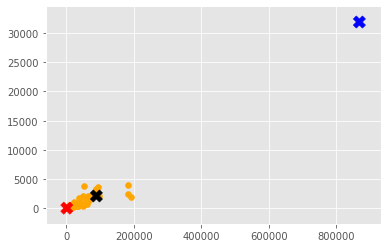

In [215]:
MyKMeans(k=3,data = df[['cases','deaths']].values,max_iter = 300).fit_k_means()

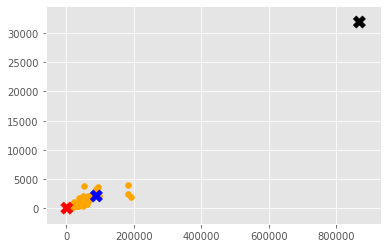

In [186]:
from sklearn.cluster import KMeans

data = df[['cases','deaths']].values
plt.scatter(x = data[:,0],y = data[:,1],c = 'orange')

centroids = KMeans(3,max_iter=200,tol=0.0001).fit(data).cluster_centers_
plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','black','blue'],marker='X',s=150)

In [ ]:
import glob
import moviepy.editor as mpy

gif_name = 'COVID.gif'
fps = 3
file_list = glob.glob('images/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

In [ ]:
centroids,prev_centroids

In [ ]:
!pip install moviepy

In [ ]:
plt.scatter(df.cases,df.deaths)
plt.scatter(x = MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,0],y = MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,1],c='r')

In [ ]:
MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,0]

In [ ]:
iter

In [ ]:
_, bins = pd.qcut(df.cases,3,retbins=True)
bins

In [ ]:
np.quantile(df.cases,0.99)

In [ ]:
k=3
1/k

In [ ]:
for k in range(1,k+1):
    print(k)
    print(0.33*k)
    print(np.quantile(df.cases,0.33*k))

In [ ]:
for k in range(0,k):
    print(np.quantile(df.deaths,0.33*k))